# PROJECT 2

Carolina Torrente, NIA:100452137

María de Neira, NIA: 100472891

Group 96

## Import libraries

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt


## Download dataset and split between train, validation and test

In [ ]:
(x_train_all, y_train_all), (x_test_all, y_test_all) = tf.keras.datasets.cifar10.load_data()

# Define the class indices for cats and birds (3 for cats and 2 for birds)
cat_class = 3
bird_class = 2

# Filter the training data
train_indices = np.where((y_train_all == cat_class) | (y_train_all == bird_class))[0]
x_train = x_train_all[train_indices]
y_train = y_train_all[train_indices]

# Filter the test data
test_indices = np.where((y_test_all == cat_class) | (y_test_all == bird_class))[0]
x_test = x_test_all[test_indices]
y_test = y_test_all[test_indices]

# Create a validation set from the training data (20% for validation)
validation_split = 0.2
num_validation_samples = int(len(x_train) * validation_split)

x_val = x_train[:num_validation_samples]
y_val = y_train[:num_validation_samples]

x_train = x_train[num_validation_samples:]
y_train = y_train[num_validation_samples:]

## Printing some images

5 Images of Birds:


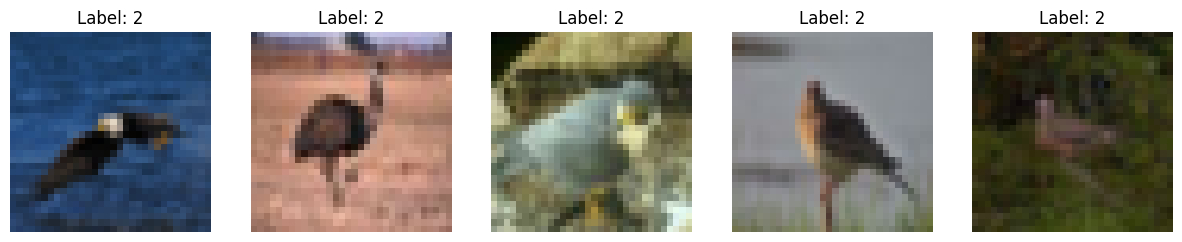

5 Images of Cats:


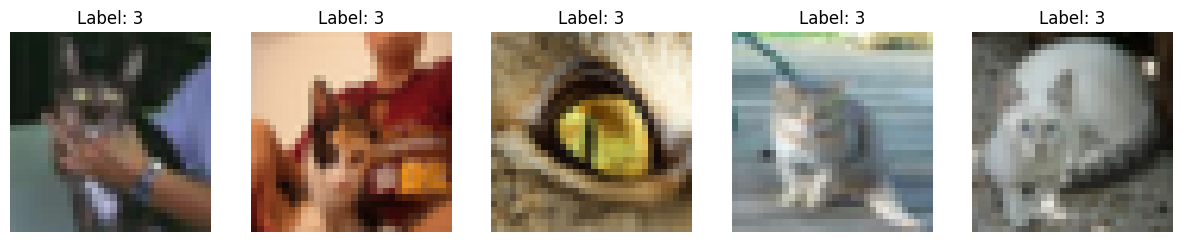

In [ ]:
# Function to display images
def display_images(images, labels, num_images=5):
  plt.figure(figsize=(15, 5))
  for i in range(num_images):
    plt.subplot(1, num_images, i + 1)
    plt.imshow(images[i])
    plt.title(f"Label: {labels[i][0]}")
    plt.axis('off')
  plt.show()


# Find indices for cats and birds in the training data
cat_indices = np.where(y_train == cat_class)[0]
bird_indices = np.where(y_train == bird_class)[0]

# Get 5 images of cats and birds
cat_images = x_train[cat_indices][:5]
bird_images = x_train[bird_indices][:5]
cat_labels = y_train[cat_indices][:5]
bird_labels = y_train[bird_indices][:5]

# Display the images
print("5 Images of Birds:")
display_images(bird_images, bird_labels)
print("5 Images of Cats:")
display_images(cat_images, cat_labels)


## Build and fit the model LeNet-5

In [ ]:
# Normalize pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_val = x_val.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert labels to binary (0 for bird, 1 for cat)
y_train = (y_train == cat_class).astype(int)
y_val = (y_val == cat_class).astype(int)
y_test = (y_test == cat_class).astype(int)

# LeNet-5 model
model = Sequential()
model.add(Conv2D(6, kernel_size=(5, 5), activation='tanh', input_shape=(32, 32, 3), padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, kernel_size=(5, 5), activation='tanh', padding='valid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(120, activation='tanh'))
model.add(Dense(84, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))  # Binary classification

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))

# Evaluate the model on the test set
loss, accuracy = model.evaluate(x_test, y_test)
print('Test accuracy:', accuracy)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 15s 54ms/step - accuracy: 0.6331 - loss: 0.6365 - val_accuracy: 0.7585 - val_loss: 0.5216
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - accuracy: 0.7513 - loss: 0.5208 - val_accuracy: 0.7880 - val_loss: 0.4862
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - accuracy: 0.7818 - loss: 0.4758 - val_accuracy: 0.7465 - val_loss: 0.5225
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - accuracy: 0.7869 - loss: 0.4595 - val_accuracy: 0.7980 - val_loss: 0.4546
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.8060 - loss: 0.4270 - val_accuracy: 0.7955 - val_loss: 0.4566
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - accuracy: 0.8142 - loss: 0.4084 - val_accuracy: 0.7980 - val_loss: 0.4550
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - accuracy: 0.8266 - loss: 0.3830 - val_accuracy: 0.8030 - val_loss: 0.4470
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 11s 44ms/step - accuracy: 0.8427 - loss: 0.3639 - v

## Evaluate the reliability diagram and the ECE in the test set using sklearn


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step


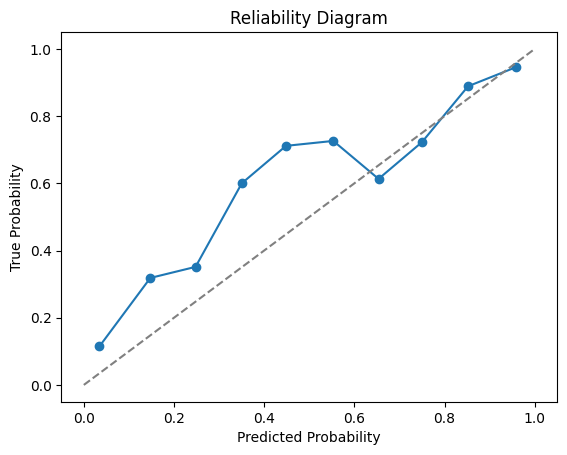

ECE: 0.11576458005704086


In [ ]:
# Get predicted probabilities for the test set
y_pred_prob = model.predict(x_test)

# Calculate reliability diagram and ECE using sklearn
fraction_of_positives, mean_predicted_value = calibration_curve(y_test, y_pred_prob, n_bins=10)

# Calculate Expected Calibration Error (ECE)
ece = np.mean(np.abs(fraction_of_positives - mean_predicted_value))

# Plot the reliability diagram
plt.plot(mean_predicted_value, fraction_of_positives, marker='o')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("Predicted Probability")
plt.ylabel("True Probability")
plt.title("Reliability Diagram")
plt.show()

print(f"ECE: {ece}")


Explanation of this graph: A reliability diagram is a visual tool used to evaluate how well a predictive model is calibrated, particularly when predicting probabilities. It is commonly used in classification tasks to compare the predicted probabilities with the actual observed outcomes.

In the context of distinguishing between birds and cats, the reliability diagram helps you assess how accurate the model's probability predictions are. For example, if your model predicts a 70% probability that an image is a cat, the diagram will show how often, in reality, the image actually is a cat when the model predicts that probability.

Conclusions: graphically, our model follows somehow the perfectly calibrated line which is a good outcome. But, a value of 0.11576458005704086 could be decreased.

## Temperature scaling

First, we will compute the model with the use of the validation set to tune the temperature.

In [ ]:
# Get predicted probabilities for the test set
y_pred_prob = model.predict(x_val)

63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step


Expected Calibration Error (ECE) with Temperature 0.1: 0.0101
Expected Calibration Error (ECE) with Temperature 0.5: 0.0085
Expected Calibration Error (ECE) with Temperature 1.0: 0.0061
Expected Calibration Error (ECE) with Temperature 2.0: 0.0047
Expected Calibration Error (ECE) with Temperature 5.0: 0.0048


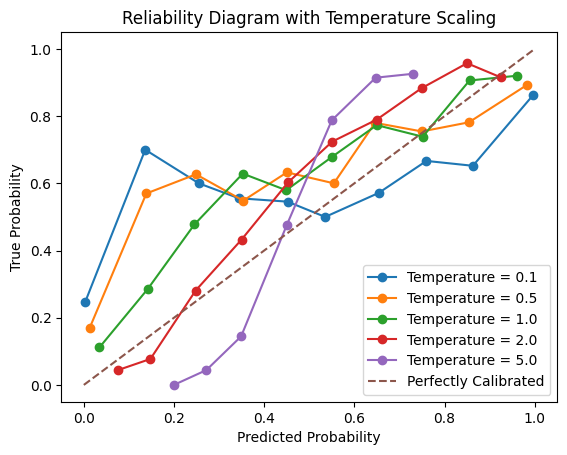

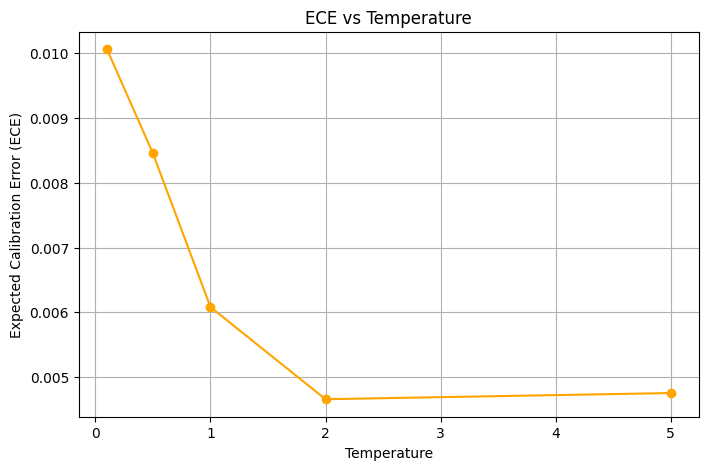

In [ ]:
def temperature_scaling(logits, temperature):
  """Applies temperature scaling to logits."""
  return logits / temperature

temperatures = [0.1, 0.5, 1.0, 2.0, 5.0]  # Temperatures to try
ece_values = []
for temp in temperatures:
    scaled_logits = temperature_scaling(np.log(y_pred_prob/(1-y_pred_prob)), temp) # We convert to logits.
    scaled_probabilities = 1 / (1 + np.exp(-scaled_logits)) # Convert back to probabilities

    # Compute calibration curve with scaled probabilities
    prob_true_scaled, prob_pred_scaled = calibration_curve(y_val, scaled_probabilities, n_bins=10)

    # Plot reliability diagram for scaled probabilities
    plt.plot(prob_pred_scaled, prob_true_scaled, marker='o', label=f'Temperature = {temp}')

    # Calculate ECE for scaled probabilities
    ece_scaled = np.sum(np.abs(prob_true_scaled - prob_pred_scaled) * (len(prob_true_scaled) / len(scaled_probabilities)))
    ece_values.append(ece_scaled)

    print(f"Expected Calibration Error (ECE) with Temperature {temp}: {ece_scaled:.4f}")

plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly Calibrated')
plt.xlabel('Predicted Probability')
plt.ylabel('True Probability')
plt.title('Reliability Diagram with Temperature Scaling')
plt.legend()
plt.show()

# Plot ECE values
plt.figure(figsize=(8, 5))
plt.plot(temperatures, ece_values, marker='o', color='orange')
plt.xlabel('Temperature')
plt.ylabel('Expected Calibration Error (ECE)')
plt.title('ECE vs Temperature')
plt.grid(True)
plt.show()

Best values come from having a=2, we are going to go more deeply on values near this one.

## Traing for temperatures closer to 2.

Expected Calibration Error (ECE) with Temperature 1.5: 0.0045
Expected Calibration Error (ECE) with Temperature 1.6: 0.0044
Expected Calibration Error (ECE) with Temperature 1.7: 0.0044
Expected Calibration Error (ECE) with Temperature 1.8: 0.0046
Expected Calibration Error (ECE) with Temperature 1.9: 0.0046
Expected Calibration Error (ECE) with Temperature 2.0: 0.0047
Expected Calibration Error (ECE) with Temperature 2.5: 0.0051
Expected Calibration Error (ECE) with Temperature 3.0: 0.0066
Expected Calibration Error (ECE) with Temperature 4.0: 0.0055
Expected Calibration Error (ECE) with Temperature 5.0: 0.0048


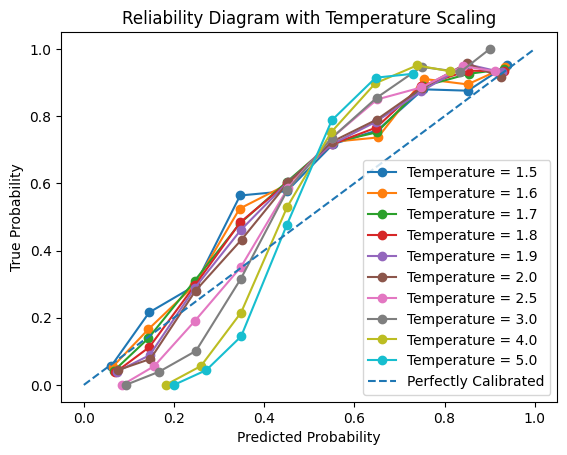

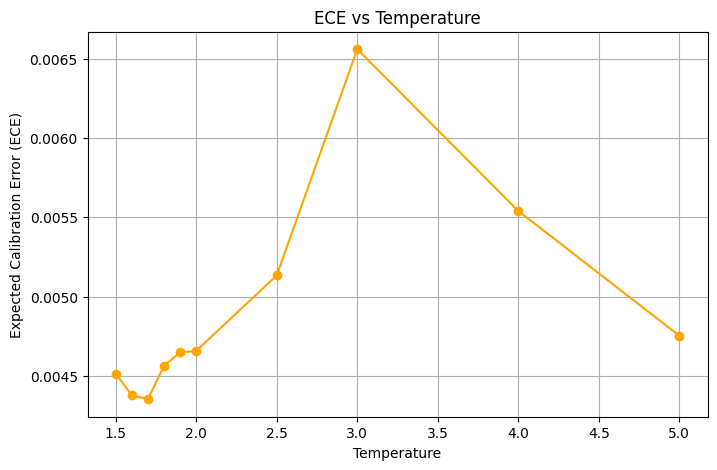

In [ ]:
temperatures = [1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.5, 3.0, 4.0, 5.0]  # Temperatures to try
ece_values = []
for temp in temperatures:
    scaled_logits = temperature_scaling(np.log(y_pred_prob/(1-y_pred_prob)), temp) # Assuming y_pred_prob are probabilities, we convert to logits.
    scaled_probabilities = 1 / (1 + np.exp(-scaled_logits)) # Convert back to probabilities

    # Compute calibration curve with scaled probabilities
    prob_true_scaled, prob_pred_scaled = calibration_curve(y_val, scaled_probabilities, n_bins=10)

    # Plot reliability diagram for scaled probabilities
    plt.plot(prob_pred_scaled, prob_true_scaled, marker='o', label=f'Temperature = {temp}')

    # Calculate ECE for scaled probabilities
    ece_scaled = np.sum(np.abs(prob_true_scaled - prob_pred_scaled) * (len(prob_true_scaled) / len(scaled_probabilities)))
    ece_values.append(ece_scaled)

    print(f"Expected Calibration Error (ECE) with Temperature {temp}: {ece_scaled:.4f}")

plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly Calibrated')
plt.xlabel('Predicted Probability')
plt.ylabel('True Probability')
plt.title('Reliability Diagram with Temperature Scaling')
plt.legend()
plt.show()

# Plot ECE values
plt.figure(figsize=(8, 5))
plt.plot(temperatures, ece_values, marker='o', color='orange')
plt.xlabel('Temperature')
plt.ylabel('Expected Calibration Error (ECE)')
plt.title('ECE vs Temperature')
plt.grid(True)
plt.show()

## Trying for temperatures closer to 1.5

Expected Calibration Error (ECE) with Temperature 1.3: 0.0050
Expected Calibration Error (ECE) with Temperature 1.4: 0.0047
Expected Calibration Error (ECE) with Temperature 1.45: 0.0046
Expected Calibration Error (ECE) with Temperature 1.5: 0.0045
Expected Calibration Error (ECE) with Temperature 1.55: 0.0045
Expected Calibration Error (ECE) with Temperature 1.6: 0.0044
Expected Calibration Error (ECE) with Temperature 1.7: 0.0044
Expected Calibration Error (ECE) with Temperature 1.8: 0.0046


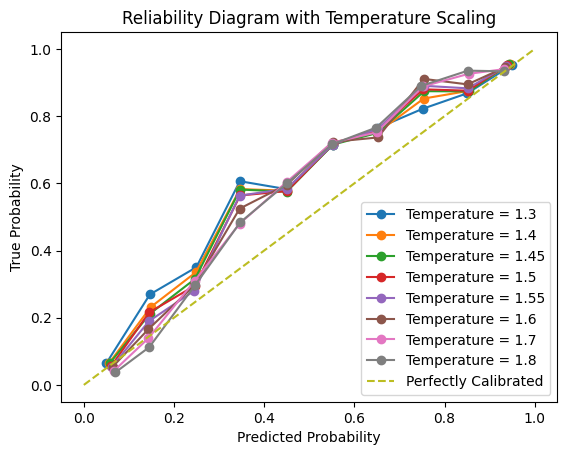

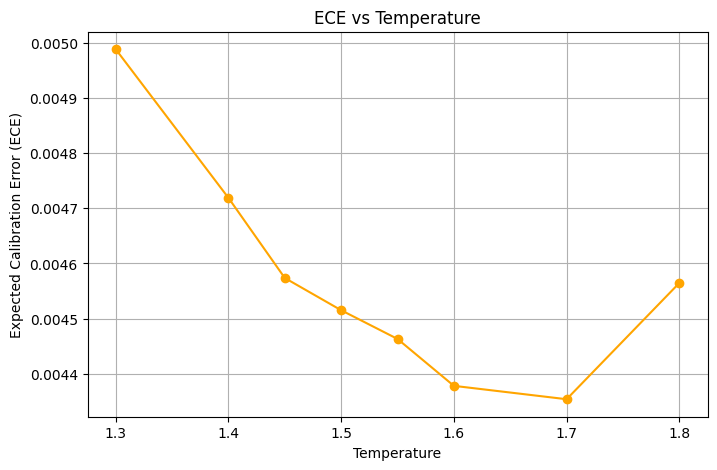

In [ ]:
temperatures = [1.3, 1.4, 1.45, 1.5, 1.55, 1.6, 1.7, 1.8]  # Temperatures to try
ece_values = []

for temp in temperatures:
    scaled_logits = temperature_scaling(np.log(y_pred_prob/(1-y_pred_prob)), temp) # Assuming y_pred_prob are probabilities, we convert to logits.
    scaled_probabilities = 1 / (1 + np.exp(-scaled_logits)) # Convert back to probabilities

    # Compute calibration curve with scaled probabilities
    prob_true_scaled, prob_pred_scaled = calibration_curve(y_val, scaled_probabilities, n_bins=10)

    # Plot reliability diagram for scaled probabilities
    plt.plot(prob_pred_scaled, prob_true_scaled, marker='o', label=f'Temperature = {temp}')

    # Calculate ECE for scaled probabilities
    ece_scaled = np.sum(np.abs(prob_true_scaled - prob_pred_scaled) * (len(prob_true_scaled) / len(scaled_probabilities)))
    ece_values.append(ece_scaled)
    print(f"Expected Calibration Error (ECE) with Temperature {temp}: {ece_scaled:.4f}")

plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly Calibrated')
plt.xlabel('Predicted Probability')
plt.ylabel('True Probability')
plt.title('Reliability Diagram with Temperature Scaling')
plt.legend()
plt.show()

# Plot ECE values
plt.figure(figsize=(8, 5))
plt.plot(temperatures, ece_values, marker='o', color='orange')
plt.xlabel('Temperature')
plt.ylabel('Expected Calibration Error (ECE)')
plt.title('ECE vs Temperature')
plt.grid(True)
plt.show()

From this tests, we can observe how the best (lowest) ECE is obtained from having temperature = 1.7 with an ECE of 0.0044. Notice that around this last numbers, all values where very small and vary only on some few decimals.

Next step is to try applying this temperature to the test set and compare the results with the one obtained on the first steps of the project.

## Show results for test set applying temperature = 1.7

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step


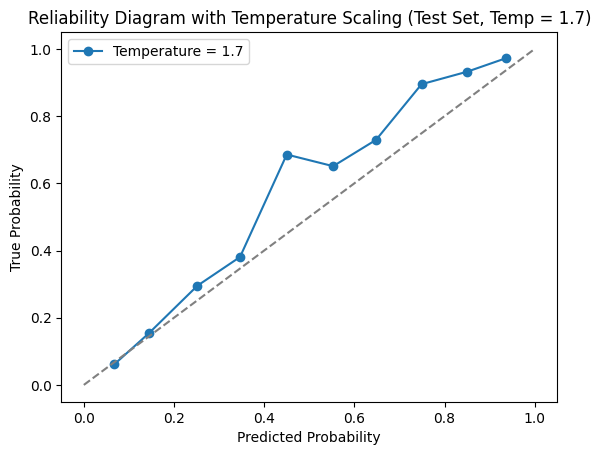

ECE for temperature 1.7 on the test set: 0.0772


In [ ]:
#predict again probabilities with the test set
y_pred_prob_test = model.predict(x_test)

#apply our best temperature
temp = 1.7
scaled_logits_test = temperature_scaling(np.log(y_pred_prob_test / (1 - y_pred_prob_test)), temp)
scaled_probabilities_test = 1 / (1 + np.exp(-scaled_logits_test))

fraction_of_positives_scaled, mean_predicted_value_scaled = calibration_curve(y_test, scaled_probabilities_test, n_bins=10)

# Compute Expected Calibration Error (ECE)
ece_scaled = np.mean(np.abs(fraction_of_positives_scaled - mean_predicted_value_scaled))


plt.plot(mean_predicted_value_scaled, fraction_of_positives_scaled, marker='o', label=f'Temperature = {temp}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Line of perfect calibration
plt.xlabel("Predicted Probability")
plt.ylabel("True Probability")
plt.title(f"Reliability Diagram with Temperature Scaling (Test Set, Temp = {temp})")
plt.legend()
plt.show()

#Print ECE
print(f"ECE for temperature {temp} on the test set: {ece_scaled:.4f}")


In [ ]:
# Evaluate the model on the test set with temperature scaling
temp = 1.7
scaled_logits = temperature_scaling(np.log(model.predict(x_test) / (1 - model.predict(x_test))), temp)
scaled_probabilities = 1 / (1 + np.exp(-scaled_logits))
loss, accuracy = model.evaluate(x_test, y_test)
print('Test accuracy with temperature scaling:', accuracy)
print(f"Test Accuracy with Temperature {temp}: {accuracy:.4f}")



63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7762 - loss: 0.4824
Test accuracy with temperature scaling: 0.7680000066757202
Test Accuracy with Temperature 1.7: 0.7680


# EXTRA

Note: For using ResNet, all pre-trained models expect input images normalized in the same way, i.e. mini-batches of 3-channel RGB images of shape (3 x H x W), where H and W are expected to be at least 224. The images have to be loaded in to a range of [0, 1] and then normalized using mean = [0.485, 0.456, 0.406] and std = [0.229, 0.224, 0.225].

## Import libraries

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision import models
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import random_split

## Import dataset

As mentioned above, to adjust to this pretrained model, we have to transform the dataset, i.e. resize it to 224x224 and normalize it.

In [ ]:

# Load and preprocess dataset for pretrained model
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize for ResNet input
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# Filter dataset for birds (class 2) and cats (class 3)
class_indices = [2, 3]

filtered_train_data = [(img, class_indices.index(label)) for img, label in zip(trainset.data, trainset.targets) if label in class_indices]
filtered_test_data = [(img, class_indices.index(label)) for img, label in zip(testset.data, testset.targets) if label in class_indices]

# Create PyTorch Dataset
class CIFAR10BinaryDataset(torch.utils.data.Dataset):
    def __init__(self, data):
        self.images = [torchvision.transforms.functional.to_tensor(img) for img, _ in data]
        self.labels = [label for _, label in data]

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.images[idx], self.labels[idx]

# Prepare datasets
train_dataset = CIFAR10BinaryDataset(filtered_train_data)
test_dataset = CIFAR10BinaryDataset(filtered_test_data)

# Split training data into train and validation (80/20 split)
train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_subset, val_subset = random_split(train_dataset, [train_size, val_size])

# Create DataLoaders
trainloader = torch.utils.data.DataLoader(train_subset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(val_subset, batch_size=64, shuffle=False)
testloader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

print(f"Train samples: {len(train_subset)}")
print(f"Validation samples: {len(val_subset)}")
print(f"Test samples: {len(test_dataset)}")


Train samples: 8000
Validation samples: 2000
Test samples: 2000


Due to RAM space problems, we had to adjust everything to pytroch

## Load a pre-trained ResNet50 model and modify it

We will be working with a ResNet50 pre-trained model but our data set is binary and predicts cats and birds so the last layer should be modify according to this while the rest are kept frozen.

In [ ]:
model = models.resnet50(pretrained=True)

# Modify the last layer to output 2 classes
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, 2)  # Modifies the last layer so that it gets a binary output (birds or cats)
#print(model) #to verify the new model

# Define training parameters
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


## Train and evaluate for test set

Same as in previous section, we will train and evaluate the model with the test set so that we have a value to compare with once we adjust the temperature.

In [ ]:
def train_model(model, trainloader, criterion, optimizer, num_epochs=10):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        for images, labels in trainloader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss / len(trainloader):.4f}")

  # Evaluate calibration
def evaluate_calibration(model, testloader):
    model.eval()
    logits = []
    targets = []
    with torch.no_grad():
        for images, labels in testloader:
            outputs = model(images)
            logits.extend(outputs.cpu().numpy())
            targets.extend(labels.cpu().numpy())

    logits = np.array(logits)
    targets = np.array(targets)
    probs = torch.softmax(torch.tensor(logits), dim=1).numpy()

    prob_true, prob_pred = calibration_curve(targets, probs[:, 1], n_bins=10)

    plt.plot(prob_pred, prob_true, marker='o', linestyle='-')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('Predicted Probability')
    plt.ylabel('True Probability')
    plt.title('Reliability Diagram')
    plt.show()

    ece = np.abs(prob_pred - prob_true).mean()
    print(f"ECE: {ece:.4f}")

def temperature_scaling(logits, temperature):
    scaled_logits = logits / temperature
    return np.exp(scaled_logits) / np.exp(scaled_logits).sum(axis=1, keepdims=True)
# Train and evaluate the model
train_model(model, trainloader, criterion, optimizer, num_epochs=10)
evaluate_calibration(model, testloader)

KeyboardInterrupt: 

## Apply for different temperatures

We will be performing the adjustment beggining with the following temperatures and depending on the ouput of the ECE value, we will focus on some of them.

In [ ]:
# Apply different temperatures and evaluate
temperatures = [0.1, 0.5, 1.0, 2.0, 5.0]
ece_values = []

for temp in temperatures:
    scaled_probs = temperature_scaling(logits, temp)
    prob_true, prob_pred = calibration_curve(targets, scaled_probs[:, 1], n_bins=10)
    ece_values.append(np.abs(prob_pred - prob_true).mean())

    plt.plot(prob_pred, prob_true, marker='o', linestyle='-', label=f'Temp: {temp}')

# Print ECE values for different temperatures
for i in range(len(temperatures)):
    print(f"Temperature {temperatures[i]} -> ECE: {ece_values[i]:.4f}")

plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('Predicted Probability')
plt.ylabel('True Probability')
plt.title('Reliability Diagram with Temperature Scaling')
plt.legend()
plt.show()



From here we were not able to continue with the code due to the few hardware resources we both had. But we were able to dig into different conclusions.

First of all, the next step would be to go more deeply into more temperatures around that specific one that has provided us with the lowest ECE.

Once we have that lowest temperature, we would test again the model for the test set but this time applying the temperature founded (same as in previous part).